# Clustering practice analysis

## Importing the dataset and loading libraries

Import numpy, pandas, matplotlib, scipy, and sklearn.

In [1]:
# import required modules
import os
import pandas as pd
import numpy as np

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Finding the path to the Fromage dataset

In [2]:
# get current working directory
os.getcwd()

'/Users/clement.guiraud/Desktop/Data analysis/Data analysis track/Clustering'

In [6]:
# change current working directory
os.chdir('/Users/clement.guiraud/Desktop/Data analysis/Data analysis track/Clustering')

Loading the dataset

In [7]:
# read and display dataset
df = pd.read_csv('fromage.txt', sep='\t', index_col=0)
display(df)

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
Fromages,,,,,,,,,
CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20
Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27
Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41
Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27
Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20
Cantal,367,256.0,264.0,28.8,48.8,5.7,23.0,90,30
Chabichou,344,192.0,87.2,27.9,90.1,36.3,19.5,80,36
Chaource,292,276.0,132.9,25.4,116.4,32.5,17.8,70,25
Cheddar,406,172.0,182.3,32.5,76.4,4.9,26.0,110,28


The Fromage dataset is made of 9 variables and 29 individuals ; it describes the composition of different cheese varieties. This dataset only has quantitative datas. 

According to this dataset, the datas have not been yet partitionned into conditioned subsets ; we may apply a clustering analysis here. 

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, CarredelEst to Yaourtlaitent.nat.
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   calories     29 non-null     int64  
 1   sodium       29 non-null     float64
 2   calcium      29 non-null     float64
 3   lipides      29 non-null     float64
 4   retinol      29 non-null     float64
 5   folates      29 non-null     float64
 6   proteines    29 non-null     float64
 7   cholesterol  29 non-null     int64  
 8   magnesium    29 non-null     int64  
dtypes: float64(6), int64(3)
memory usage: 2.3+ KB


## Dataset analysis 

In [17]:
# check basic statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
calories,29.0,300.034483,91.914356,70.0,292.0,321.0,355.0,406.0
sodium,29.0,210.086207,108.678923,22.0,140.0,223.0,276.0,432.0
calcium,29.0,185.734483,72.528882,72.6,132.9,202.3,220.5,334.6
lipides,29.0,24.158621,8.129642,3.4,23.4,26.3,29.1,33.3
retinol,29.0,67.562069,24.163098,37.1,51.6,62.3,76.4,150.5
folates,29.0,13.010345,11.723339,1.2,4.9,6.4,21.1,36.4
proteines,29.0,20.168966,6.959788,4.1,17.8,21.0,23.4,35.7
cholesterol,29.0,74.586207,28.245755,10.0,70.0,80.0,90.0,120.0
magnesium,29.0,26.965517,11.318388,10.0,20.0,26.0,30.0,51.0


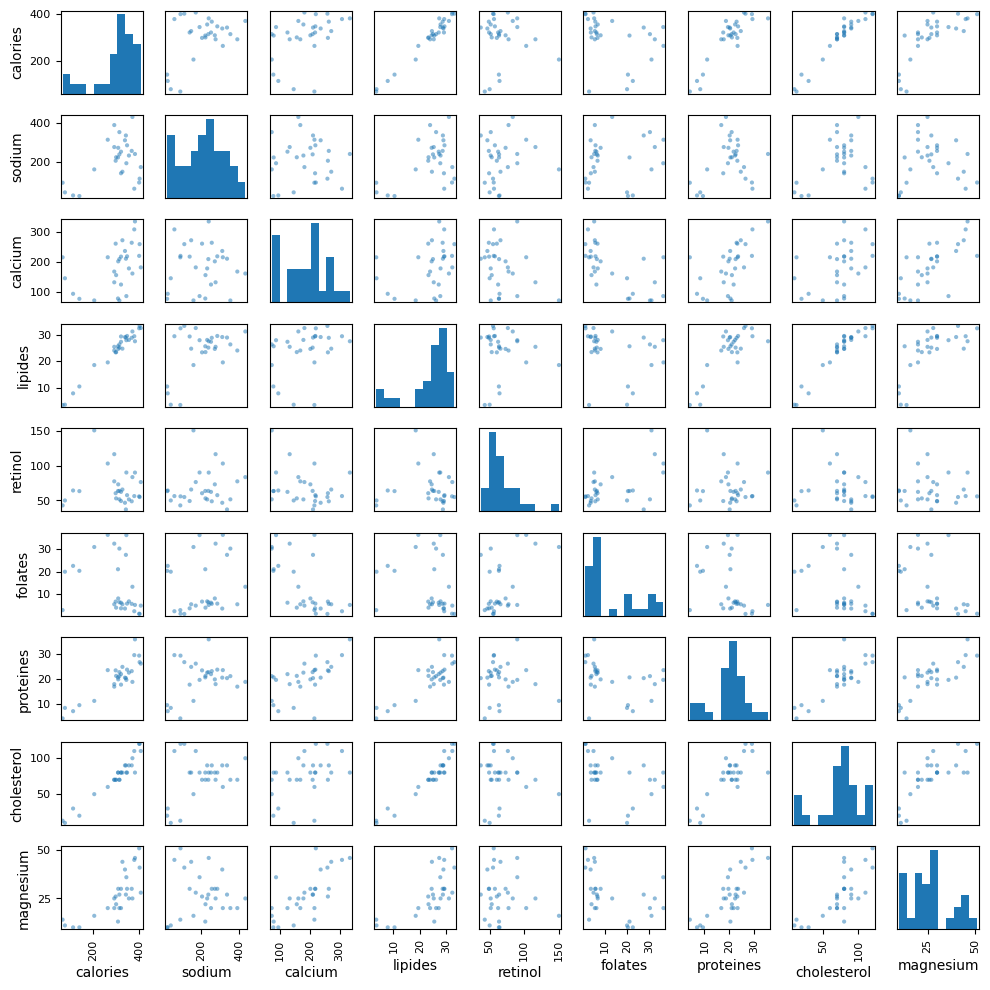

In [18]:
# Generate the scatter plot matrix
pd.plotting.scatter_matrix(df, alpha=0.5, figsize=(10, 10), diagonal='hist')
plt.tight_layout()
plt.show()

On some graphs, we may observe clear positive correlations (such as between lipides and calories), but other graphs are messier (such as relation between calories and folates) - even though clusters begin to appear. 

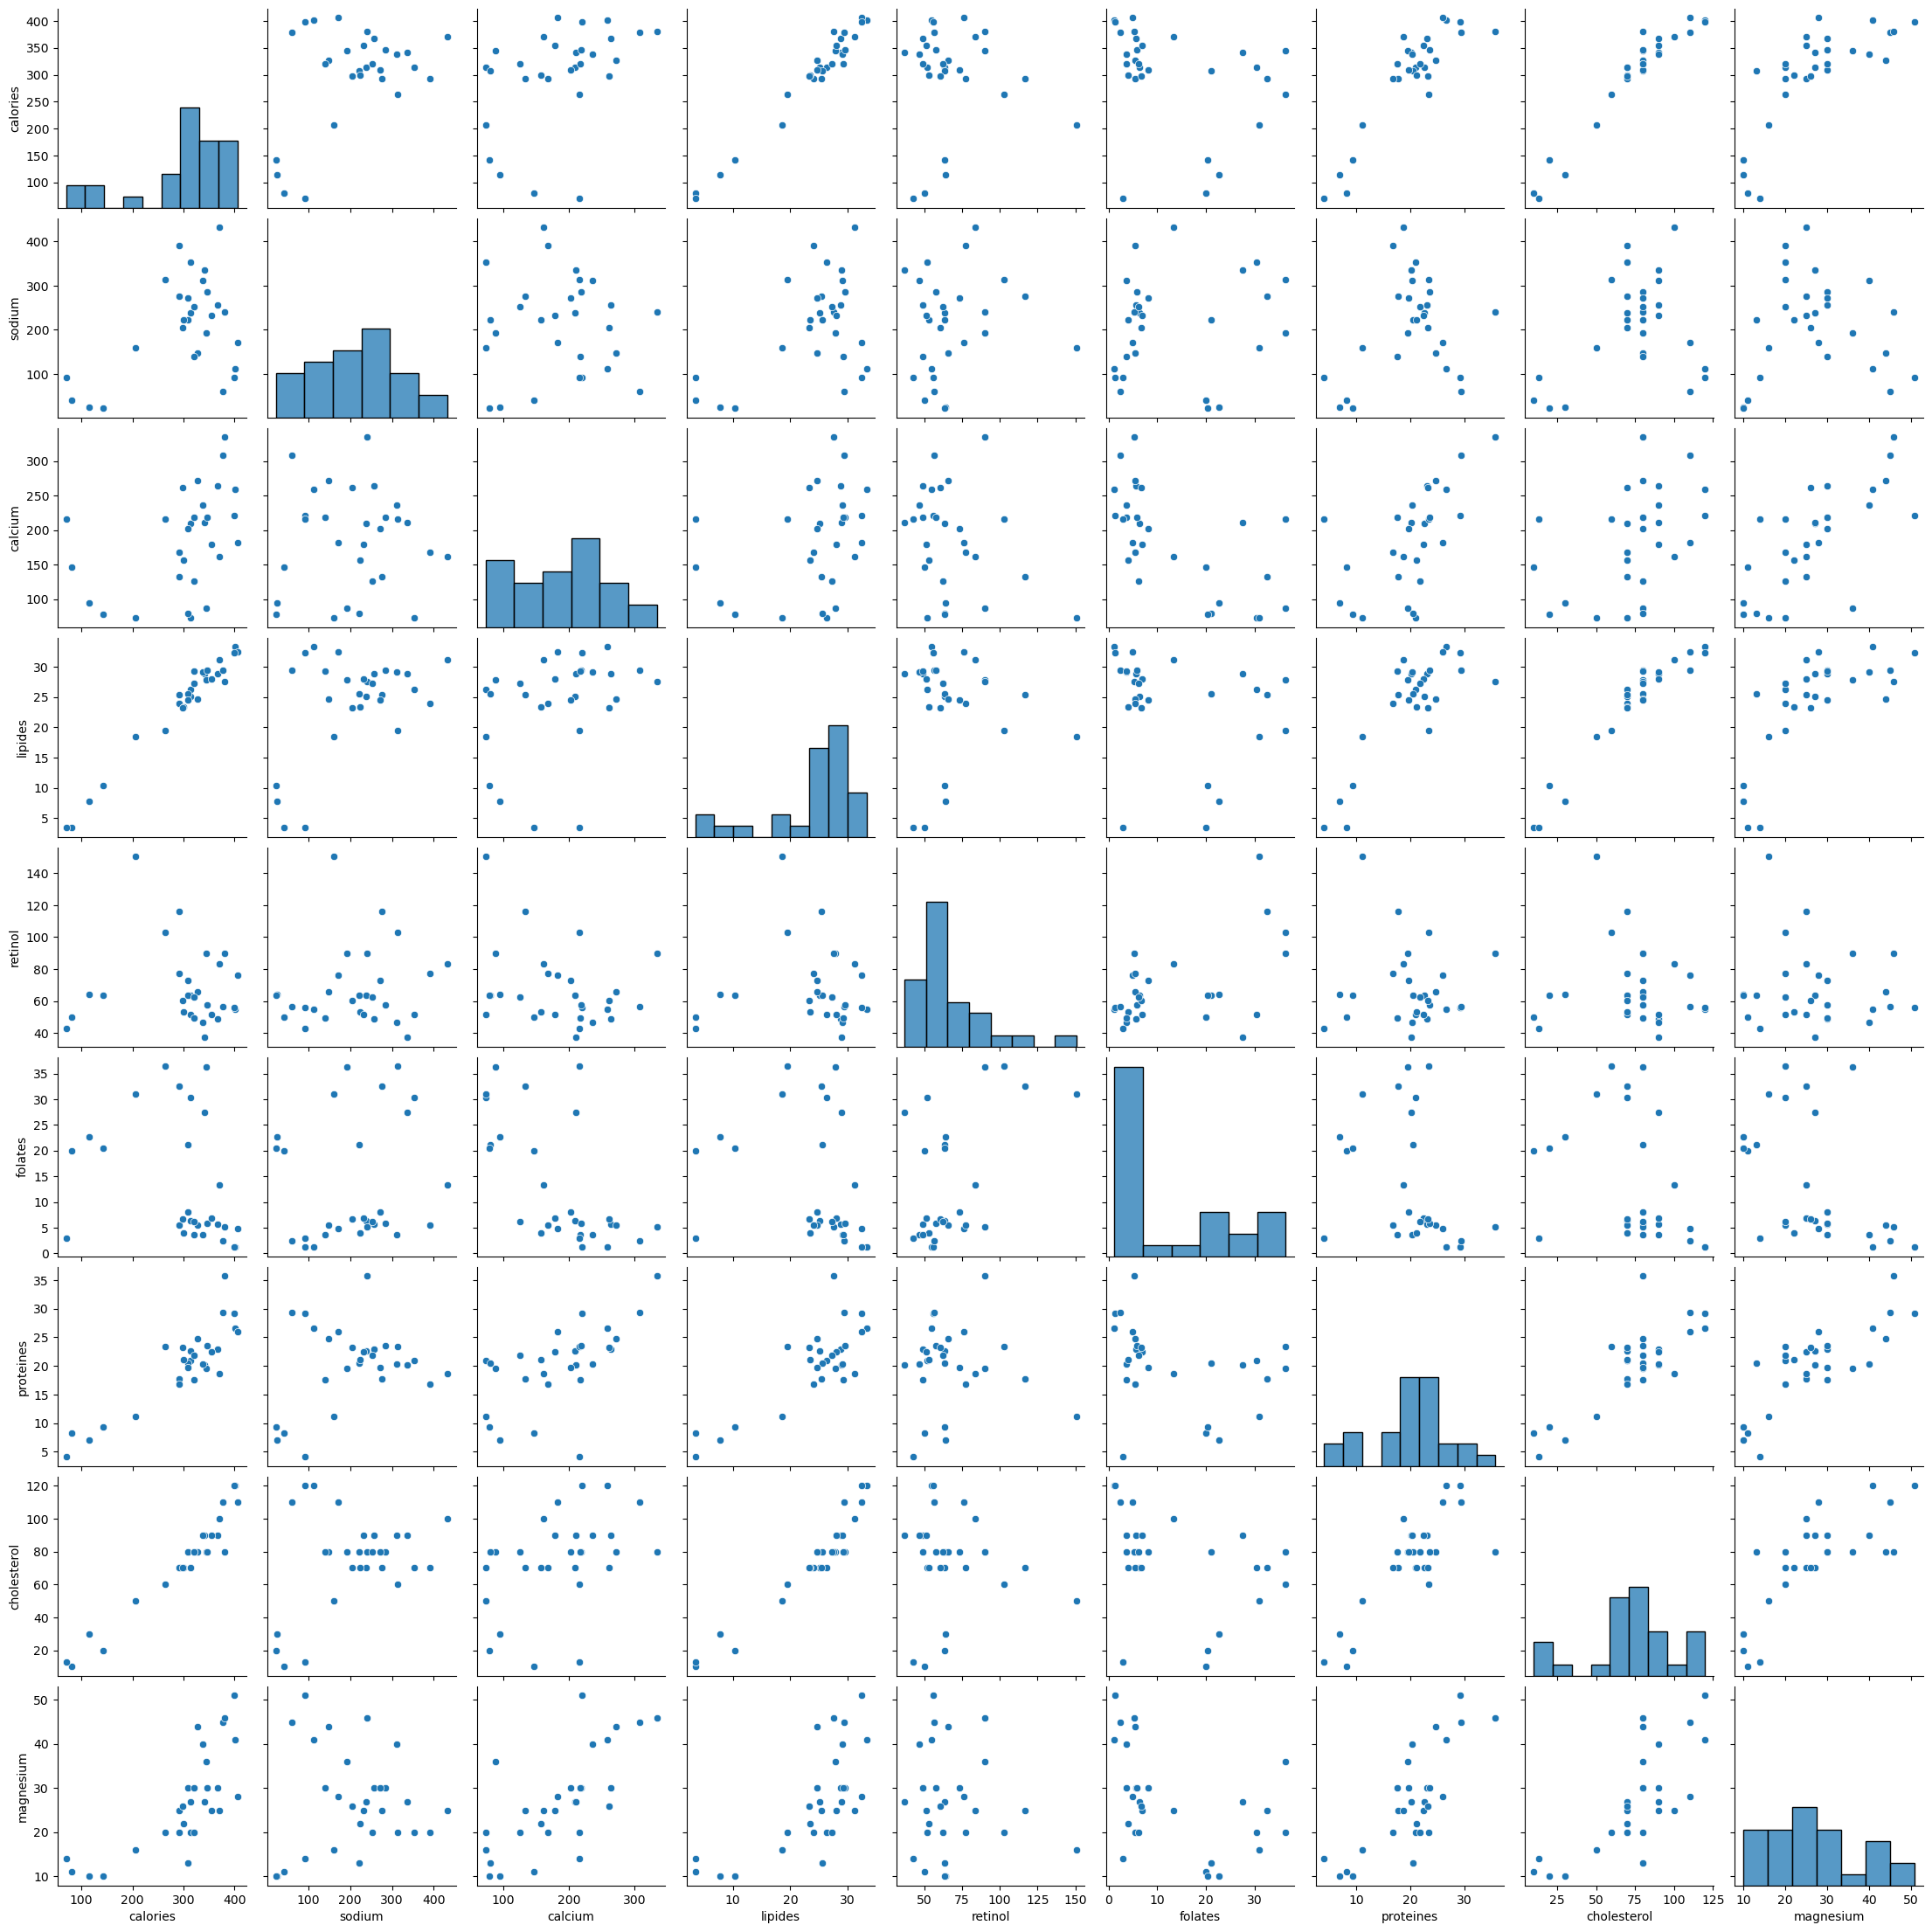

In [19]:
# or better yet
sns.pairplot(df)
plt.show()

Once again, there are clear positive correlation to be made between some variables, while some other are negatively correlated. A heatmap does not allow a clear analysis of the dataset. To go further, we should standardize those variables.

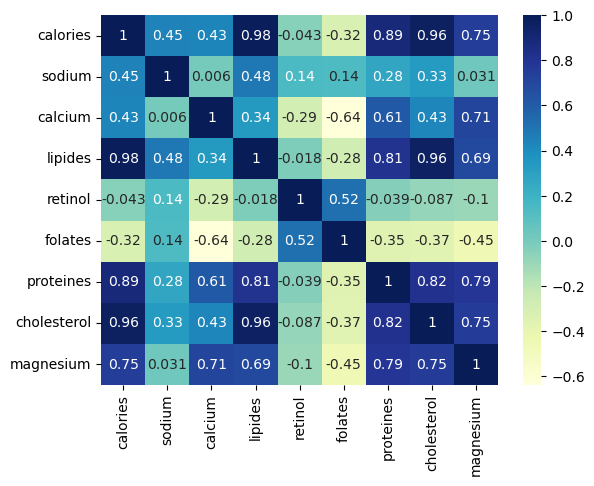

In [20]:
# heatmap with seaborn
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True);

We'll use sklearn library to standardize and preprocess the different variables

In [22]:
# data must be standardized
from sklearn.preprocessing import StandardScaler
df_sc = StandardScaler().fit_transform(df)

In [23]:
# check
from sklearn import preprocessing
np.array_equal(df_sc,preprocessing.scale(df))

True

## Agglomerative Hierarchical Clustering (AHC)

We'll use Agglomerative Hierarchical Clustering to determine the first clusters from the Fromage dataset. 

Initially, we have 29 different classes. We want to divide this number by 2 at each step by iteration ; we're going to merge 2 different classes together. 

To do so, we'll merge each variable with it's closest neigbourgh. At each step, the agglomeration indice will get stronger. 

In [25]:
# Compute linkage matrix
Z = linkage(df_sc,method='ward',metric='euclidean')

#### Cluster representation

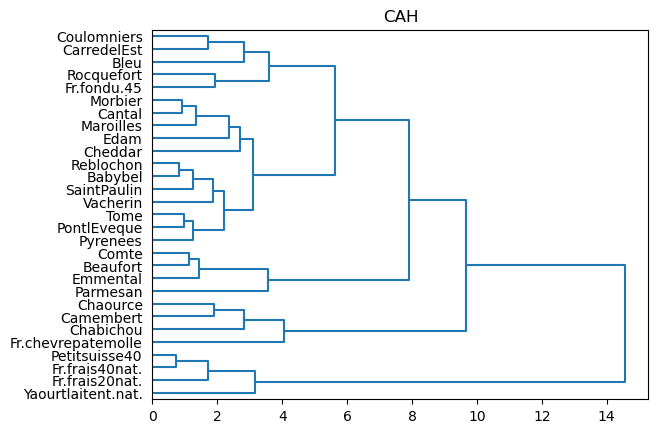

In [26]:
# display dendrogram
plt.title("CAH")
dendrogram(Z,labels=df.index,orientation='right',color_threshold=0)
plt.show()

This graph shows us that Coulomniers and CarredelEst are close individuals. Same for Morbier and Cantal, while Parmesan doesn't have clear close neigbourghs. 

We'll now split this dendogram into clear different classes, showing us our first cluster representation.

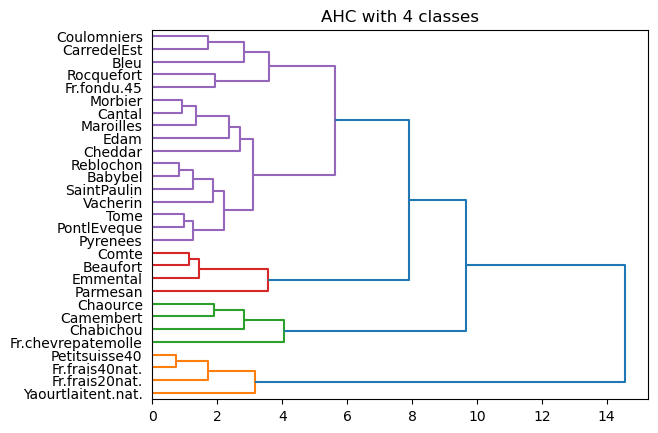

In [27]:
# show classes : cut at distance t=7
plt.title('AHC with 4 classes')
dendrogram(Z,labels=df.index,orientation='right',color_threshold=7)
plt.show()

- Comte, Beaufort, Emmental and Parmesan are one cluster.
- Chaource, Camembert, Chabichou and ChevrePateMolle are another one.
- PetitSuisse, Frais40Nat, Frais20Nat and Yaourtlaitent are another one.
- the last cluster is made up by the remaining individuals - which gather more than half of the individuals.

#### Cluster attribution

We've seen above that there's 4 differents clusters (or classes) in this dataset. We'll part individual by distance to create a dataframe which will detail which individual belongs to which class. 

In [28]:
# cutting at t = 7 ==> 4 classes retained
groupes_cah = fcluster(Z,t=7,criterion='distance')
print(groupes_cah)

[4 4 3 4 2 4 2 2 4 3 4 4 3 2 4 1 1 4 4 3 1 4 4 4 4 4 4 4 1]


In [17]:
# select indices per groups
idg = np.argsort(groupes_cah)

# plrint observations and their corresponding group
print(pd.DataFrame(df.index[idg],groupes_cah[idg]))


             Fromages
1  Yaourtlaitent.nat.
1      Fr.frais20nat.
1       Petitsuisse40
1      Fr.frais40nat.
2  Fr.chevrepatemolle
2           Camembert
2           Chabichou
2            Chaource
3            Emmental
3            Parmesan
3            Beaufort
3               Comte
4            Pyrenees
4         PontlEveque
4          Rocquefort
4         SaintPaulin
4                Tome
4           Reblochon
4         CarredelEst
4           Maroilles
4            Vacherin
4                Edam
4         Coulomniers
4             Cheddar
4              Cantal
4                Bleu
4             Babybel
4             Morbier
4         Fr.fondu.45


There's 17 individuals in cluster #4 ! 

## Elbow method

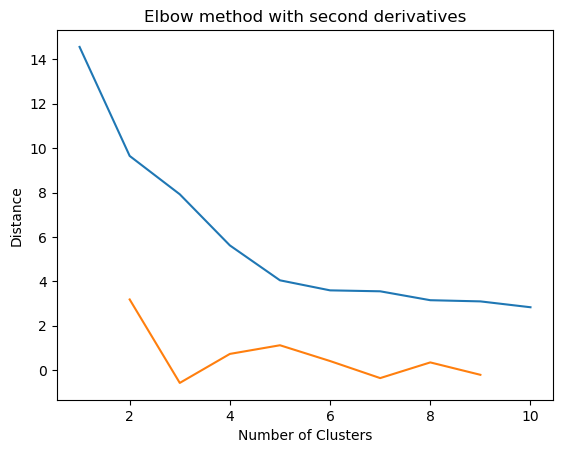

In [44]:
# Compute the linkage matrix
Z = linkage(df_sc,method='ward',metric='euclidean')

# Determine the optimal number of clusters using the elbow method
last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.xlabel("Number of Clusters")
plt.ylabel("Distance")
plt.title("Elbow method with second derivatives")
plt.show()

The graph shows us that there are two clear elbow : one at 2 and one at five.

We should only consider the number of clusters related to the orange line - which is 2. We may assess that the optimal number of cluster is 2. 

In [19]:
# The elbow point represents the optimal number of clusters
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print("The optimal number of clusters is:", k)

The optimal number of clusters is: 2


As predicted above, the optimal number of clusters is 2. 

## Silhouette scores

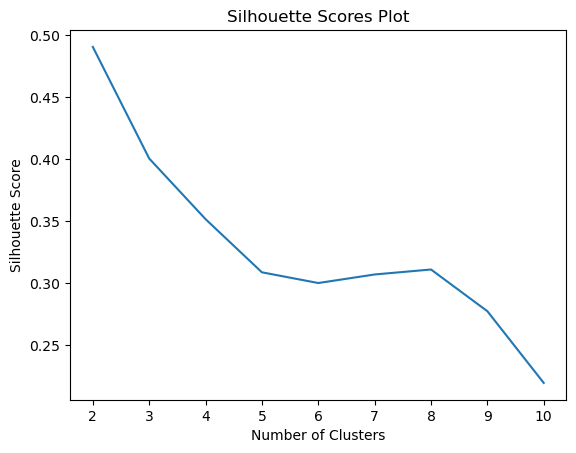

In [45]:
# Create a list to store the silhouette scores
silhouette_scores = []

# Loop over a range of possible number of clusters
for n_clusters in range(2, 11):
    # Create an instance of AgglomerativeClustering
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    
    # Fit the clusterer to the data
    clusterer.fit(df_sc)
    
    # Predict the cluster labels for each data point
    cluster_labels = clusterer.labels_
    
    # Compute the silhouette score for the current number of clusters
    score = silhouette_score(df_sc, cluster_labels)
    
    # Add the score to the list of silhouette scores
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores Plot")
plt.show()

This graph shows us that the highest silhouette score is reached at 2 clusters

In [21]:
# The optimal number of clusters is the value that corresponds to the highest silhouette score
best_n_clusters = np.argmax(silhouette_scores) + 2
print("The best number of clusters is:", best_n_clusters)


The best number of clusters is: 2


As assessed above, the ideal number of clusters is 2. 

We just use two different methods to find the same results : let's keep 2 clusters. 

## K means clustering

Before using K means method, we must fit the dataset into sklearn : 

In [31]:
# k-means on the standardized data
from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=4)
kmeans.fit(df_sc)

KMeans(n_clusters=4)

Sklearn recommands to keep 4 different clusters for the following analysis. 

In [32]:
# print inertia
print(kmeans.inertia_)

# aggregate indices by group
idk = np.argsort(kmeans.labels_)

73.00278330776281


The mean inertia of each selected cluster is around 73. 

In [33]:
# print instances et their groups
print(pd.DataFrame(df.index[idk],kmeans.labels_[idk]))

             Fromages
0         Fr.fondu.45
0             Babybel
0                Tome
0                Bleu
0         SaintPaulin
0              Cantal
0          Rocquefort
0           Reblochon
0             Cheddar
0            Pyrenees
0         PontlEveque
0             Morbier
0           Maroilles
0            Vacherin
1         CarredelEst
1         Coulomniers
1            Chaource
1           Chabichou
1           Camembert
1  Fr.chevrepatemolle
2      Fr.frais20nat.
2      Fr.frais40nat.
2       Petitsuisse40
2  Yaourtlaitent.nat.
3            Emmental
3                Edam
3            Parmesan
3               Comte
3            Beaufort


This dataframe gives us the clear distribution of each cluster created by sklearn. 

In [25]:
# distances to the center of the observations classes
print(kmeans.transform(df_sc))

[[5.52563871 4.96135531 2.22366092 2.8747584 ]
 [5.19015189 2.57234902 3.0178739  0.72270816]
 [7.50534896 1.00918163 5.16141204 2.96554549]
 [6.12458901 3.71377754 3.23696124 2.05877139]
 [5.40377152 4.92555984 1.93343014 3.50921027]
 [6.29601131 2.01139577 4.02486207 1.22881552]
 [5.92595629 4.30518991 1.77869718 3.41671778]
 [5.55487006 4.85071534 1.03237227 3.45898933]
 [6.82455372 1.90942769 3.74803439 2.10328745]
 [7.84252968 1.35963218 5.4424737  3.52533426]
 [4.84286038 4.44495956 1.95795563 2.49171031]
 [6.12567693 1.384483   4.22922422 2.29375693]
 [7.47787998 1.11870963 5.52630163 3.48354598]
 [5.01044821 6.86837578 3.09730277 5.53615119]
 [5.28233144 4.2020413  2.837017   1.81119459]
 [0.682889   7.50645539 5.33113973 5.92012248]
 [1.00738319 7.1684495  4.5471731  5.54327791]
 [6.46351268 2.33361207 4.19758324 1.5123226 ]
 [6.06067377 2.26573106 3.47104401 0.68723117]
 [7.94344639 2.21752288 5.23422932 3.65314525]
 [1.21455139 6.96920651 4.37575251 5.3402089 ]
 [4.69330459 

This function transforms each row into an array giving the distance of each point from the center of each clusters

In [26]:
# check correspondance with AHC groups
pd.crosstab(groupes_cah,kmeans.labels_)

col_0,0,1,2,3
row_0,,,,
1,4,0,0,0
2,0,0,4,0
3,0,4,0,0
4,0,2,2,13


This function prints the cross table of both tables given by the Agglomerative Hierarchical Clustering method and the k means method. We can see that cluster #1 from AHC has the same number of individuals as cluster #0 from kmeans, and that cluster #4 from AHC is splitted between 3 different kmean clusters. 

AHC method and Kmean method do not print the same clusters.

## Silhouette representation

In [35]:
# package to estimate partitions
from sklearn import metrics

# sihouette score metrics
# make number of clusters vary from 0 to 10
res = np.arange(9,dtype="double")
for k in np.arange(9):
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(df_sc)
    res[k] = metrics.silhouette_score(df_sc,km.labels_)
    
print(res)

[0.48626255 0.38724166 0.34540073 0.28710206 0.27280181 0.30382126
 0.30514332 0.30528797 0.26599343]


This cell split the dataset in 10 different clusters, and then determines for each its silhouette coefficient (-1 being the worse, +1 being the best)

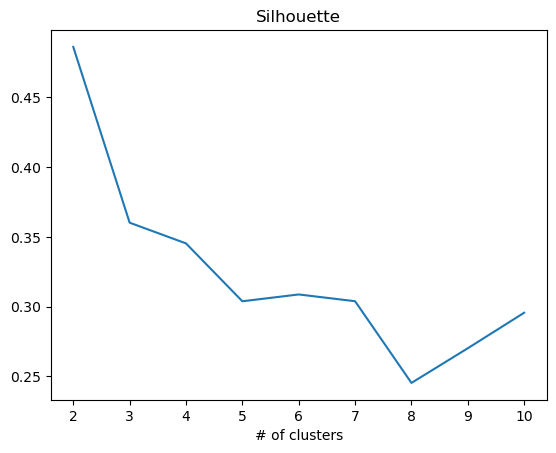

In [28]:
# plot
import matplotlib.pyplot as plt
plt.title("Silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,11,1),res)
plt.show()

We can see here that 2 clusters provides the most information, and 8 the less. 

In [36]:
# means per variable
m = df.mean()

In [30]:
# total sum of square
TSS = df.shape[0]*df.var(ddof=0)
print(TSS)

calories       236550.965517
sodium         330711.034483
calcium        147292.285517
lipides          1850.550345
retinol         16347.948276
folates          3848.226897
proteines        1356.282069
cholesterol     22339.034483
magnesium        3586.965517
dtype: float64


In [31]:
# data frame conditioned to the groups
gb = df.groupby(kmeans.labels_)

In [32]:
# conditional counts
nk = gb.size()
display(nk)

0     4
1     6
2     6
3    13
dtype: int64

In [33]:
# conditional means
mk = gb.mean()
display(mk)

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
0,101.750000,44.750000,133.750000,6.275000,55.150000,16.475000,7.200000,18.250000,11.250000
1,382.000000,137.333333,262.866667,29.966667,66.533333,3.416667,28.600000,103.333333,42.500000
2,288.000000,252.916667,110.100000,23.866667,95.866667,31.266667,18.883333,68.333333,21.666667
3,328.769231,274.769231,201.038462,27.115385,58.792308,7.946154,20.861538,81.538462,27.076923


In [34]:
# group distance per group from the mean
EMk = (mk-m)**2

# weighted by the groups count
EM = EMk.multiply(nk,axis=0)

In [35]:
# Between sum of square (BSS)
BSS = np.sum(EM,axis=0)
print(BSS)

calories       209179.907825
sodium         206499.435124
calcium         83873.991415
lipides          1595.859255
retinol          6429.302378
folates          2933.405422
proteines        1115.422966
cholesterol     18516.387047
magnesium        2604.459107
dtype: float64


In [36]:
# square correlation ratio
# variance explained by being in the groups
R2 = BSS/TSS
print(R2)

calories       0.884291
sodium         0.624410
calcium        0.569439
lipides        0.862370
retinol        0.393279
folates        0.762275
proteines      0.822412
cholesterol    0.828880
magnesium      0.726090
dtype: float64


The goal of the cells above is to compute two types of variances : the one within each group and the one within each centroid. We want here to minimize the variance within each group while maximizing the variance within each centroid. To do that, we need to maximize R2 : the greater, the more compact and separated the groups are. Here, calories contributes the most into separating the clusters while compacting them between them.

## Interpretation

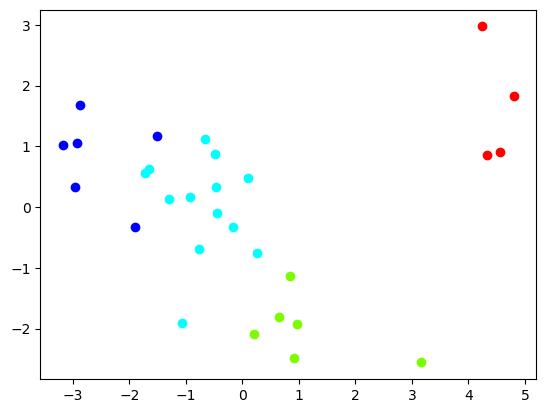

In [37]:
# Look for more contrast through PCA
from sklearn.decomposition import PCA
acp = PCA(n_components=2).fit_transform(df_sc)

# project in the first factorial plane
# with a color code based on the group
for couleur,k in zip(['red','blue','lawngreen','aqua'],[0,1,2,3]):
    plt.scatter(acp[kmeans.labels_==k,0],acp[kmeans.labels_==k,1],c=couleur)
plt.show() 

We'll use here PCA to do visual representation of our modalities, and to which cluster they belong. The cluster distribution is made following kmeans rule. 

We can also assess that the red cluster is not allowing us to do detail observation since they are too excentered on the graph. We should get rid of this cluster to produce a more accurate representation of the three other clusters.

In [39]:
# remove observations belong to group #0 of k-means
df_subset = df.iloc[kmeans.labels_!=0,:]
print(df_subset.shape)

(25, 9)


We're getting rid here of the red cluster from the graph above. 

In [40]:
# standardize
from sklearn import preprocessing
df_subset_sc = preprocessing.scale(df_subset)

# generate link matrix
Z_subset = linkage(df_subset_sc,method='ward',metric='euclidean')   

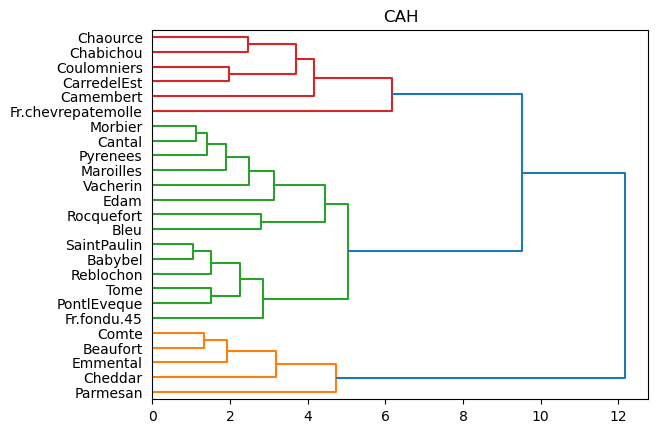

[3 2 1 2 3 2 3 3 1 1 3 2 1 3 2 2 2 1 2 2 2 2 2 2 2]


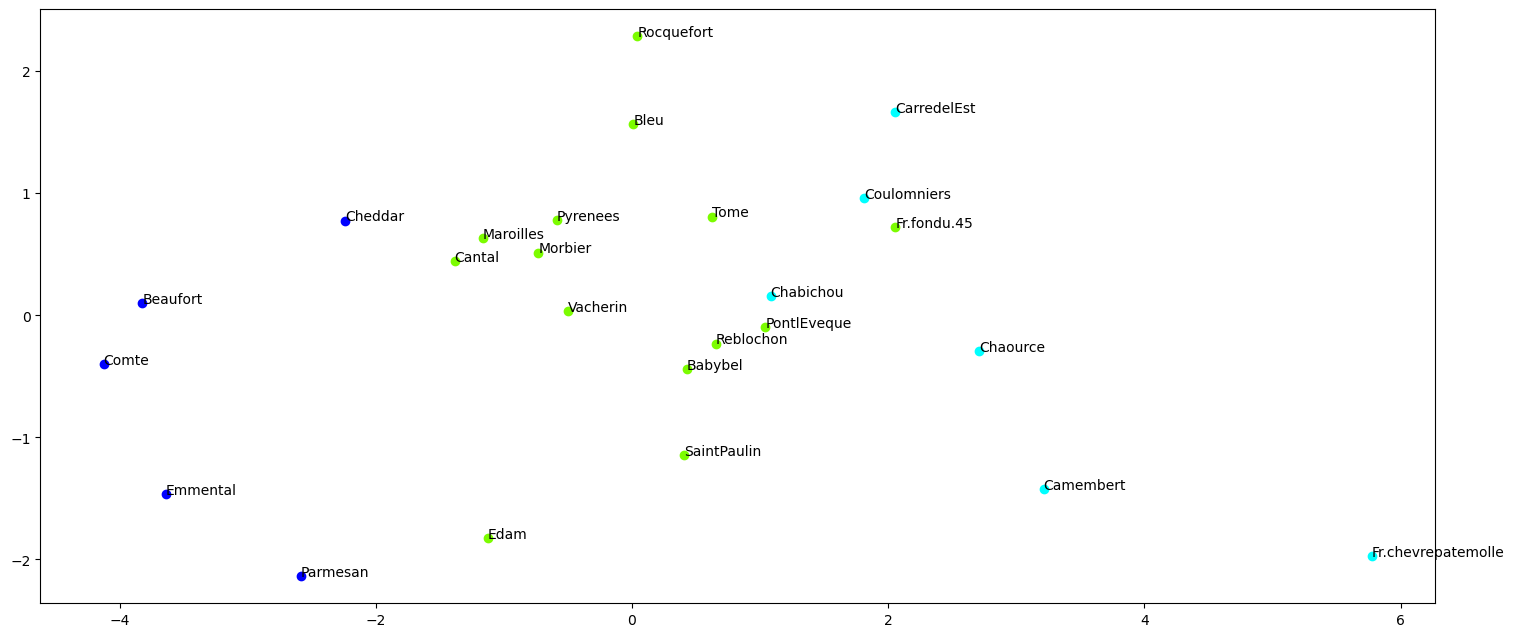

In [42]:
# AHC and dendrogram
plt.title("CAH")
dendrogram(Z_subset,labels=df_subset.index,orientation='right',color_threshold=7)
plt.show()

# groups
groupes_subset_cah = fcluster(Z_subset,t=7,criterion='distance')
print(groupes_subset_cah)

# PCA
acp_subset = PCA(n_components=2).fit_transform(df_subset_sc)

# project in first factorial plan
# with a different color code according to the group
plt.figure(figsize=(18,7.715))
for couleur,k in zip(['blue','lawngreen','aqua'],[1,2,3]):
    plt.scatter(acp_subset[groupes_subset_cah==k,0],acp_subset[groupes_subset_cah==k,1],c=couleur)

# include the labels
for i,label in enumerate(df_subset.index):
    plt.annotate(label,(acp_subset[i,0],acp_subset[i,1]))

plt.show() 

Using PCA subset constitution & dendogram and graphic representation, we can finally make an accurate representation of all individuals belonging to the 3 clusters ; we got rid of the red cluster.